# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('spam.csv')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
403,ham,None of that's happening til you get here though,NaN,NaN,NaN
2436,ham,Btw regarding that we should really try to see...,NaN,NaN,NaN
5141,spam,FREE for 1st week! No1 Nokia tone 4 ur mobile ...,NaN,NaN,NaN
398,ham,"Good evening Sir, Al Salam Wahleykkum.sharing ...",NaN,NaN,NaN
3760,ham,Was just about to ask. Will keep this one. May...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 columns

df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [7]:
df.sample(5)

,v1,v2
1662,spam,Hi if ur lookin 4 saucy daytime fun wiv busty ...
2030,ham,"Ugh y can't u just apologize, admit u were wro..."
5442,ham,"I thought i'd get him a watch, just cos thats ..."
1327,spam,Ur balance is now å£500. Ur next question is: ...
5251,ham,"Yeah work is fine, started last week, all the ..."


In [8]:
#renaming columns

df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
940,ham,No we sell it all so we'll have tons if coins....
5238,ham,Yeah I can still give you a ride
296,ham,Unless it's a situation where YOU GO GURL woul...
2703,ham,Yup no more already... Thanx 4 printing n hand...
2997,ham,No b4 Thursday


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#duplicate value
df.duplicated().sum()

403

In [14]:
#remove duplicate
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

In [17]:
df.describe()

,target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## EDA

In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

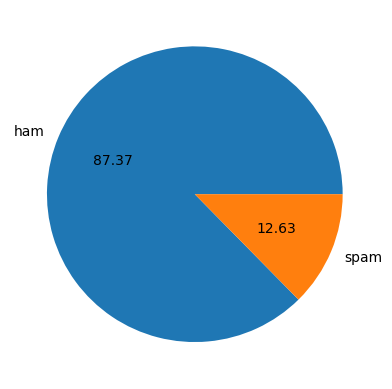

In [19]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vaishnavi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaishnavi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vaishnavi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vaishnavi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [21]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [22]:
df['num_characters']=df['text'].apply(len)

In [23]:
df.sample(5)

,target,text,num_characters
524,1,"URGENT!: Your Mobile No. was awarded a å£2,000...",145
2908,1,URGENT! Your Mobile number has been awarded wi...,137
2438,0,I not busy juz dun wan 2 go so early.. Hee..,45
3876,0,"Sorry sir, i will call you tomorrow. senthil....",50
4404,0,Dun need to use dial up juz open da browser n ...,53


In [24]:
#num of words

df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.sample(5)

,target,text,num_characters,num_words
4214,0,No dear i was sleeping :-P,26,7
4363,0,So what about you. What do you remember,39,9
4803,0,"Er, hello, things didn‰Û÷t quite go to plan ‰Û...",114,23
2507,0,Yup...,6,2
769,0,Lol I know! They're so dramatic. Schools alrea...,137,30


In [26]:
#num of sentence

df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences
2248,0,will you like to be spoiled? :),31,9,2
296,0,Unless it's a situation where YOU GO GURL woul...,67,13,1
494,0,Are you free now?can i call now?,32,10,1
1946,0,Hey we can go jazz power yoga hip hop kb and y...,54,12,1
3236,0,Ron say fri leh. N he said ding tai feng cant ...,86,21,3


In [27]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [28]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe() #ham msg

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe() #spam msg

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

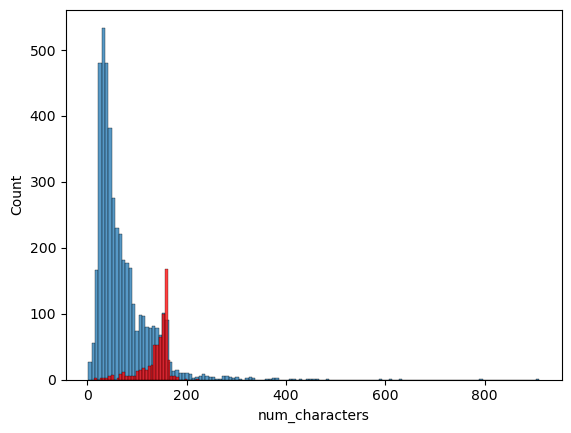

In [40]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

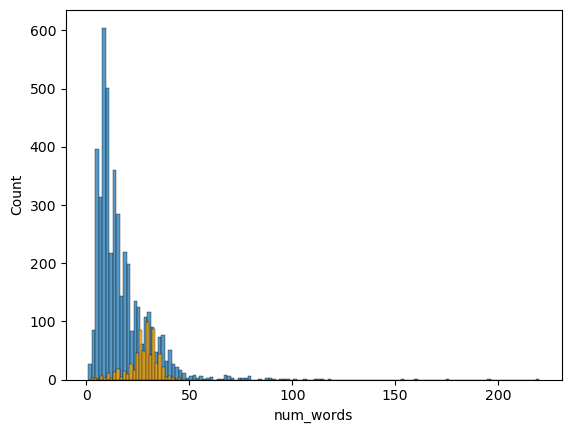

In [44]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='orange')

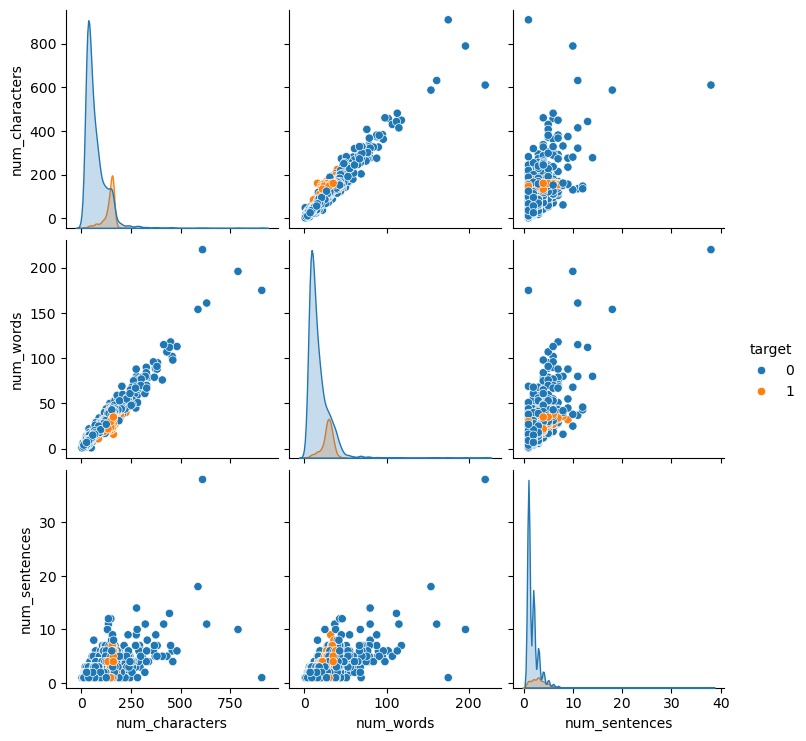

In [45]:
sns.pairplot(df,hue='target')

## Data Preprocessing

In [30]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [31]:
def transform_text(text):
    #lower case 
    text=text.lower()
    #tokenizing words
    text=nltk.word_tokenize(text)
    
    #removing special characters
    y=[]

    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    #removing stopwords and punctuation

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


    #stemming

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [32]:
df['transformed_text']=df['text'].apply(transform_text)

In [33]:
df.sample(10)

,target,text,num_characters,num_words,num_sentences,transformed_text
473,1,Want 2 get laid tonight? Want real Dogging loc...,159,34,5,want 2 get laid tonight want real dog locat se...
1273,1,network operator. The service is free. For T &...,66,15,3,network oper servic free c visit
4046,1,"Thanks for your ringtone order, reference numb...",156,25,2,thank rington order refer number mobil charg t...
3343,0,Oh great. I.ll disturb him more so that we can...,52,13,2,oh great disturb talk
3677,1,Promotion Number: 8714714 - UR awarded a City ...,179,32,4,promot number 8714714 ur award citi break coul...
630,0,Please dont say like that. Hi hi hi,35,9,2,pleas dont say like hi hi hi
5258,0,1 in cbe. 2 in chennai.,23,8,2,1 cbe 2 chennai
1400,0,"No, I decided that only people who care about ...",93,19,1,decid peopl care stuff vote care stuff loser
2670,0,Yes. They replied my mail. I'm going to the ma...,117,26,4,ye repli mail go manag offic later plu bank la...
1898,0,Wat would u like 4 ur birthday?,31,8,1,wat would u like 4 ur birthday


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [46]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=''))

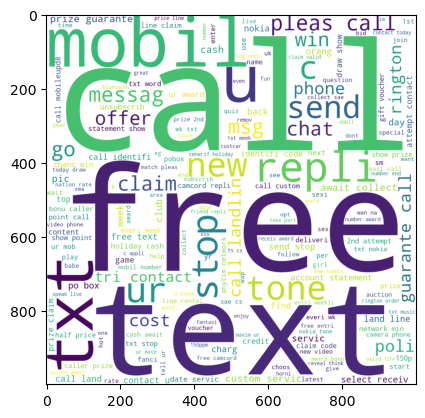

In [47]:
plt.imshow(spam_wc)

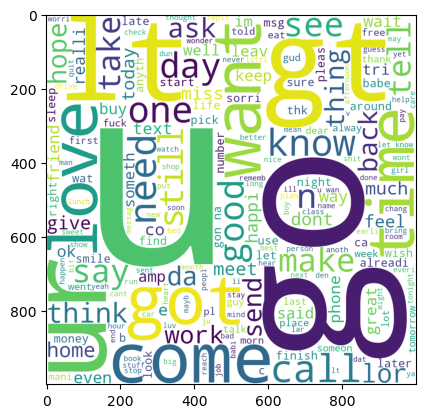

In [48]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=''))
plt.imshow(ham_wc)

In [49]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [57]:
len(spam_corpus)

9939

In [59]:
from collections import Counter

In [64]:
top_spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30),
                              columns=['Word', 'Count'])

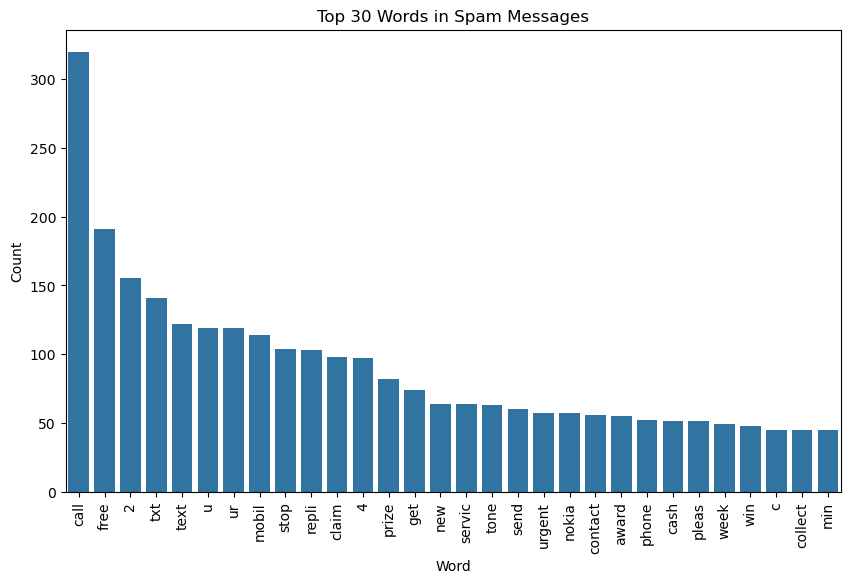

In [65]:
plt.figure(figsize=(10,6))
sns.barplot(x='Word', y='Count', data=top_spam_words)
plt.xticks(rotation='vertical')
plt.title("Top 30 Words in Spam Messages")
plt.show()

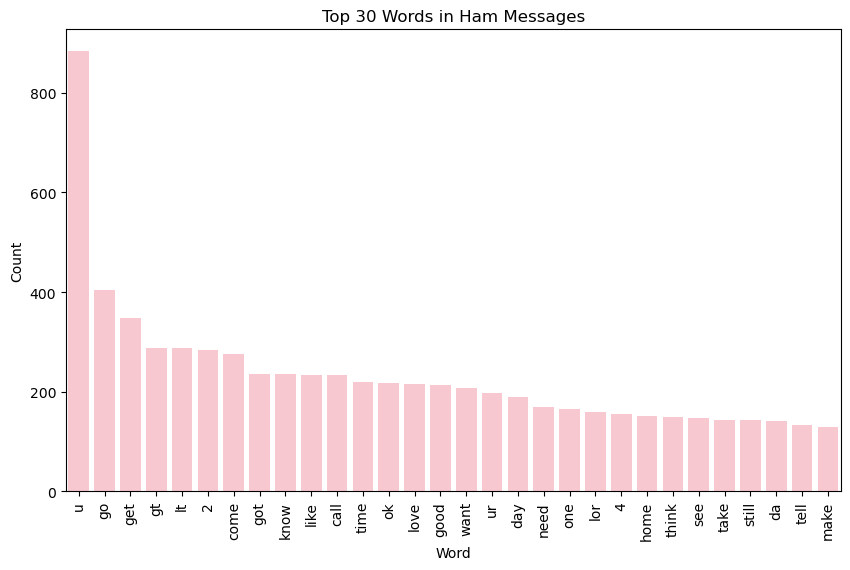

In [67]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

top_ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30),
                              columns=['Word', 'Count'])

plt.figure(figsize=(10,6))
sns.barplot(x='Word', y='Count', data=top_ham_words,color='pink')
plt.xticks(rotation='vertical')
plt.title("Top 30 Words in Ham Messages")
plt.show()

## Model Building